In [1]:
#! pip install seaborn
#! pip install matplotlib
#! pip install pandas
#! pip install numpy
#! pip install scikit-learn
#! pip install statsmodels

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('Thyroid_Diff.csv')

In [4]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

age: getal

Gender: M or F --> man of vrouw

Smoking: rookt ja of nee

Hx smoking: heeft een geschiedenis/verleden van Roken

Hx Radiothreapy: spelfout; heeft in het verleden Radiotherapie gekregen

Thyroid Function: Euthyroid is normaal, Clinical Hyperthyroidism is niet normaal

Physical Examination: details over het medisch onderzoek (wat voor soort knobbel hebben ze)

Adenopathy: zijn er vergrote klieren; ja of nee

Pathologie: de soort

Focality: op 1 of meerdere plaatsen

Risk: risico (laag, gemiddeld, hoog)

T: tumor parameter

N: Node parameter

M: metastase parameter

Stage: hoever staat de kanker

Response: wat is de invloed van de behandeling

Recurred: is de kanker teruggekomen?

In [6]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [8]:
df_encoded = pd.get_dummies(df)
df_encoded.head()


,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_No,Recurred_Yes
0,27,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,30,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [9]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender_F                                          383 non-null    bool 
 2   Gender_M                                          383 non-null    bool 
 3   Smoking_No                                        383 non-null    bool 
 4   Smoking_Yes                                       383 non-null    bool 
 5   Hx Smoking_No                                     383 non-null    bool 
 6   Hx Smoking_Yes                                    383 non-null    bool 
 7   Hx Radiothreapy_No                                383 non-null    bool 
 8   Hx Radiothreapy_Yes                               383 non-null    bool 
 9   Thyroid Function_Clinical Hyperthyroidism  

run code twice for it to show the heatmap properly

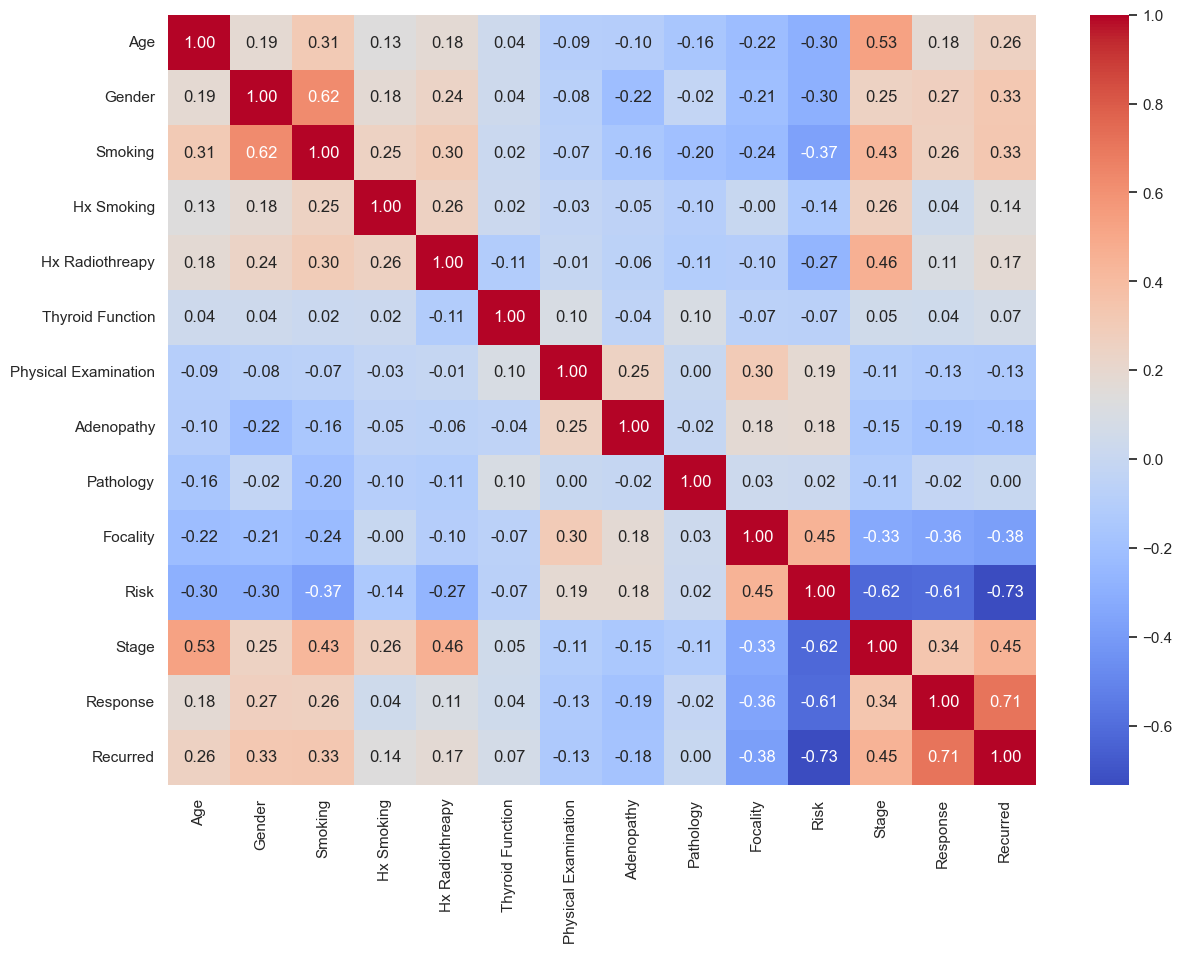

In [26]:
columns_to_encode = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Stage', 'Response', 'Recurred']

# Apply label encoding to selected columns
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df, columns=['T', 'N', 'M'])

# Select only numerical columns for correlation analysis
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_encoded[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()
# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [28]:
correlation_matrix

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.036043,-0.092546,-0.101509,-0.159689,-0.223847,-0.295556,0.526862,0.180643,0.258897
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.037558,-0.079013,-0.215953,-0.023539,-0.207634,-0.295229,0.250215,0.272868,0.328189
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.017750,-0.066707,-0.155523,-0.202167,-0.238494,-0.374324,0.426152,0.263184,0.333243
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.022111,-0.027658,-0.050382,-0.095052,-0.001204,-0.138403,0.262371,0.042867,0.136073
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,-0.112998,-0.013437,-0.057781,-0.106469,-0.102415,-0.272056,0.461901,0.105908,0.174407
Thyroid Function,0.036043,0.037558,0.017750,0.022111,-0.112998,1.000000,0.097316,-0.044032,0.095392,-0.067081,-0.072472,0.046218,0.044829,0.067758
Physical Examination,-0.092546,-0.079013,-0.066707,-0.027658,-0.013437,0.097316,1.000000,0.248599,0.001206,0.304883,0.187451,-0.105831,-0.129953,-0.131801
Adenopathy,-0.101509,-0.215953,-0.155523,-0.050382,-0.057781,-0.044032,0.248599,1.000000,-0.015111,0.175732,0.182049,-0.150069,-0.190686,-0.182530
Pathology,-0.159689,-0.023539,-0.202167,-0.095052,-0.106469,0.095392,0.001206,-0.015111,1.000000,0.030219,0.020351,-0.111171,-0.019872,0.003272
Focality,-0.223847,-0.207634,-0.238494,-0.001204,-0.102415,-0.067081,0.304883,0.175732,0.030219,1.000000,0.450615,-0.331892,-0.356521,-0.383776


In [29]:
df_numerical

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,3,3,1


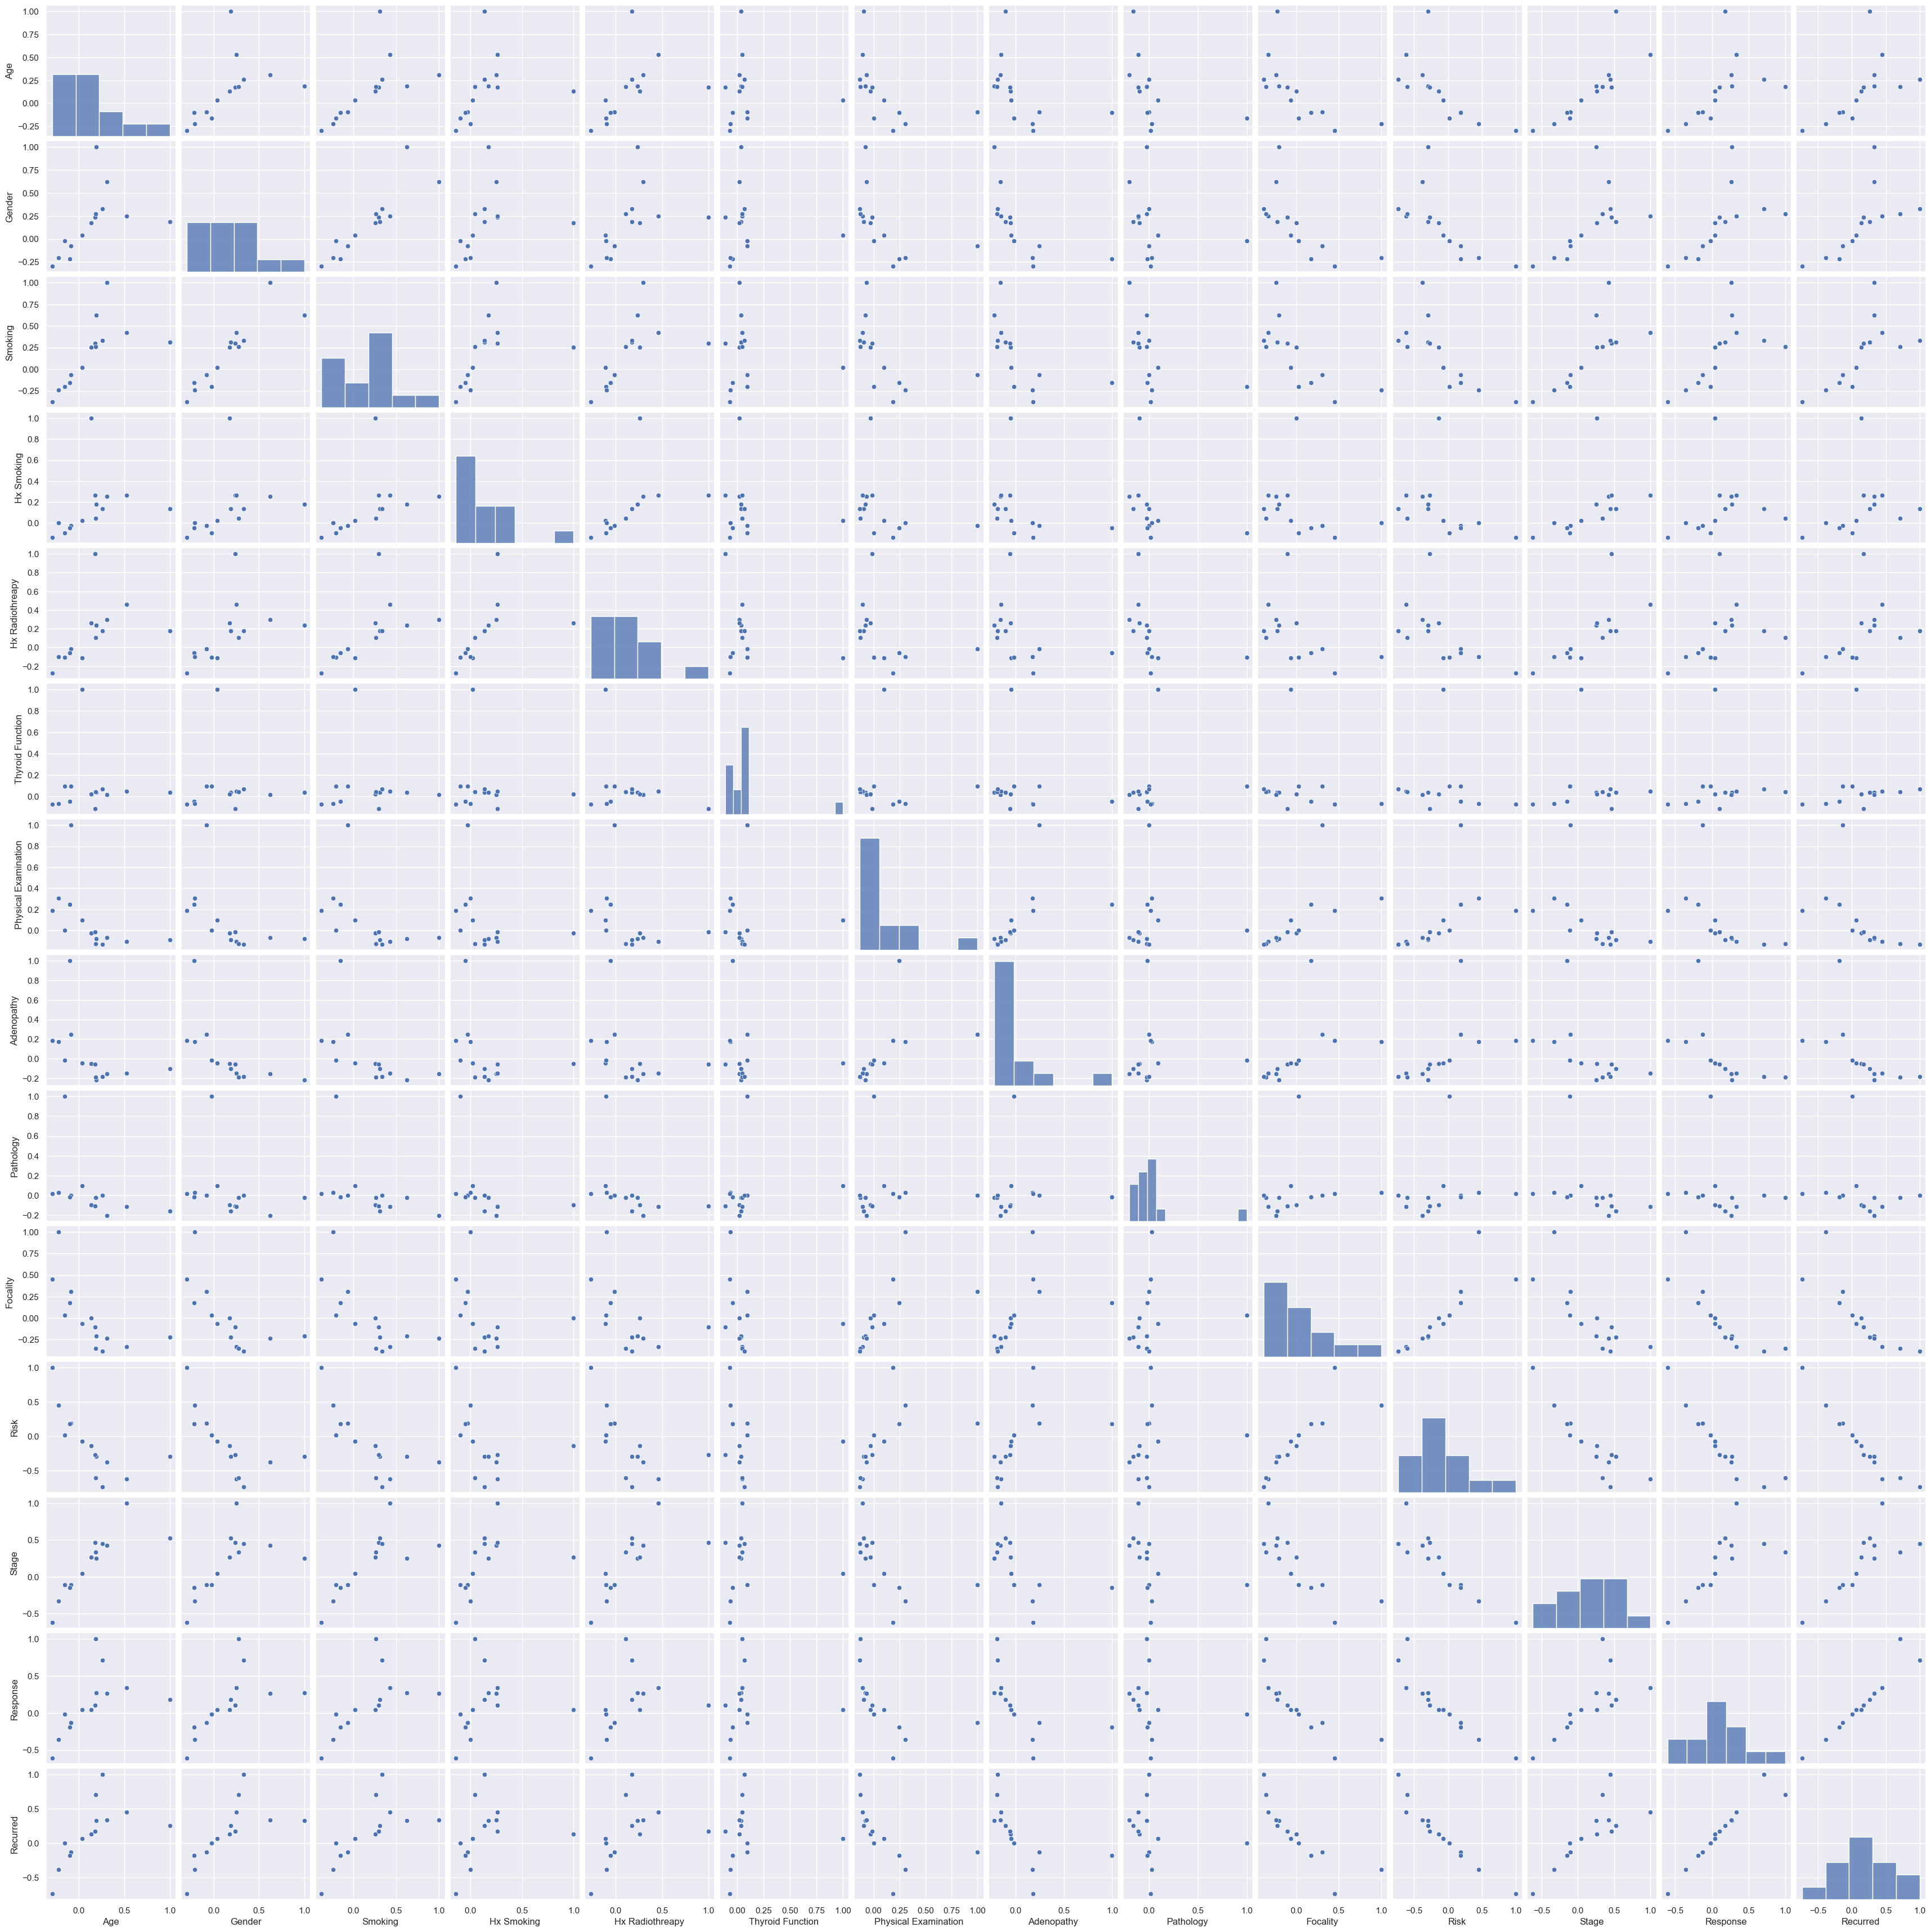

In [30]:
sns.pairplot(correlation_matrix)

<Axes: ylabel='Age'>

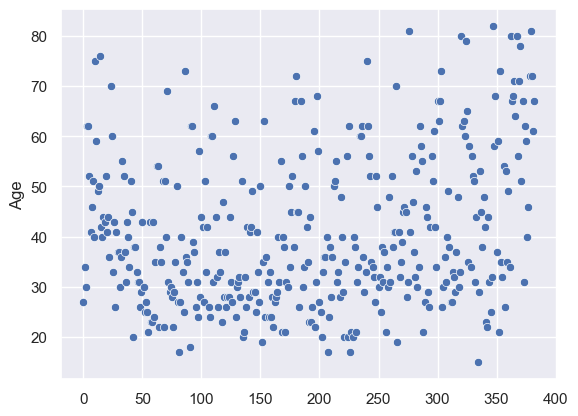

In [31]:
sns.scatterplot(df['Age'])

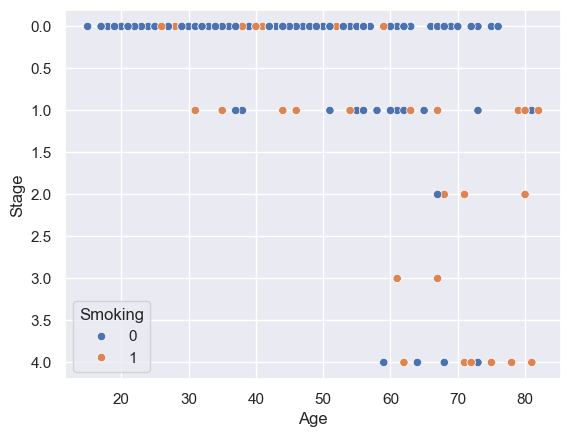

In [32]:
sns.scatterplot(x='Age', y='Stage', data=df, hue='Smoking')
plt.gca().invert_yaxis()

In [33]:
df = pd.read_csv('Thyroid_Diff.csv')

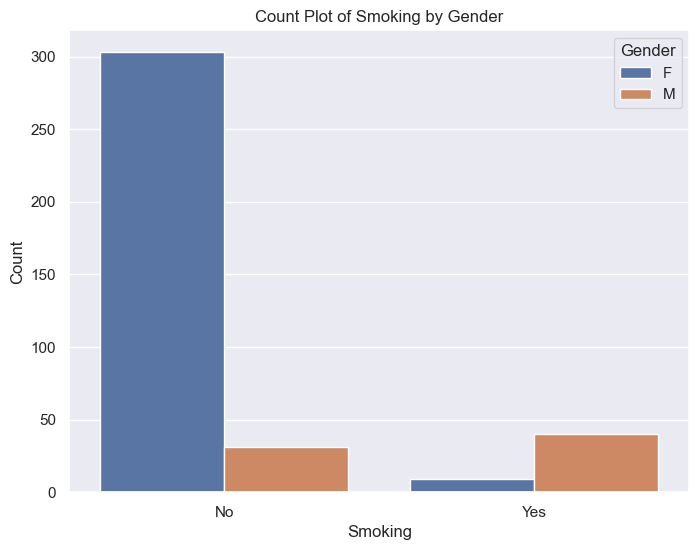

In [34]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Gender', data=df)

# Add labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Count Plot of Smoking by Gender')

# Show the plot
plt.show()

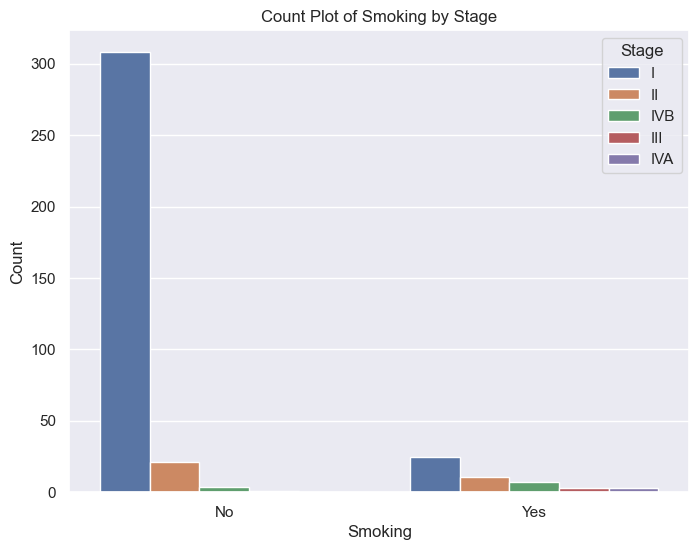

In [35]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Stage', data=df)

# Add labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Count Plot of Smoking by Stage')

# Show the plot
plt.show()

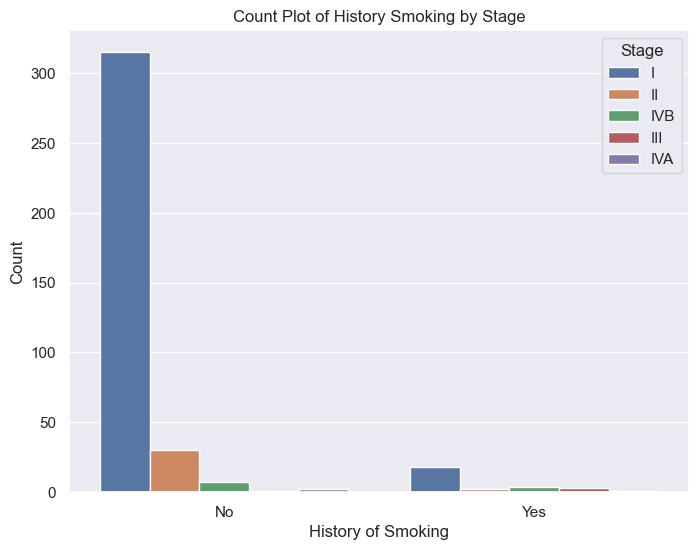

In [36]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Smoking', hue='Stage', data=df)

# Add labels and title
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.title('Count Plot of History Smoking by Stage')

# Show the plot
plt.show()

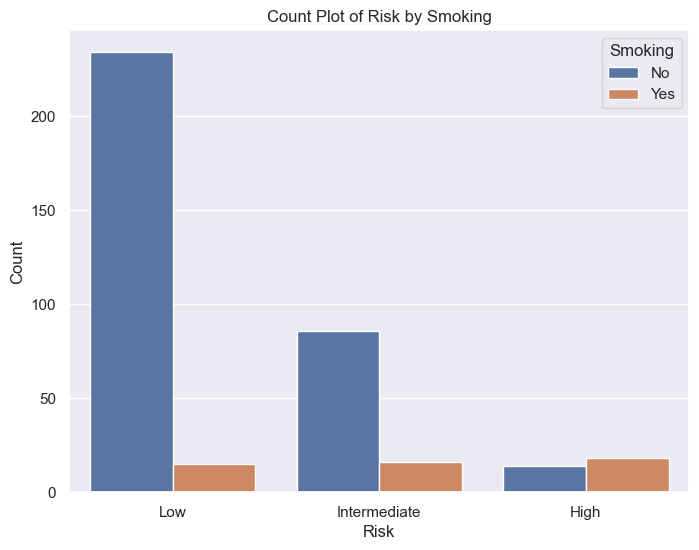

In [37]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk', hue='Smoking', data=df)

# Add labels and title
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Count Plot of Risk by Smoking')

# Show the plot
plt.show()

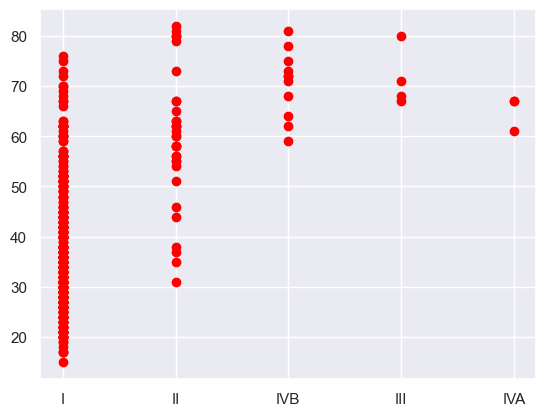

In [38]:
plt.scatter(df['Stage'],df['Age'] , color='red')

#### Classificatie en Regressie

In [39]:
from sklearn.metrics import confusion_matrix

df = pd.read_csv('Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


aanmaken variable 1 --> smoked door het combineren van mensen met een geschiedenis van roken en mensen die momenteel roken.

In [40]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['Hx Smoking'] = label_encoder.fit_transform(df['Hx Smoking'])
df['Smoked'] = df['Smoking'] | df['Hx Smoking']
df['Smoked'].value_counts()

Smoked
0    318
1     65
Name: count, dtype: int64

In [41]:

df_numerical['Smoked'] = df_numerical['Smoking'] | df_numerical['Hx Smoking']
df_numerical['Smoked'].value_counts()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_27540\1026277665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Smoked'] = df_numerical['Smoking'] | df_numerical['Hx Smoking']


Smoked
0    318
1     65
Name: count, dtype: int64

In [42]:
df_numerical

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred,Smoked
0,27,0,0,0,0,2,3,3,2,1,2,0,2,0,0
1,34,0,0,1,0,2,1,3,2,1,2,0,1,0,1
2,30,0,0,0,0,2,4,3,2,1,2,0,1,0,0
3,62,0,0,0,0,2,4,3,2,1,2,0,1,0,0
4,62,0,0,0,0,2,1,3,2,0,2,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,4,0,1,1
379,81,1,1,0,1,2,1,1,3,0,0,4,3,1,1
380,72,1,1,1,0,2,1,0,3,0,0,4,3,1,1
381,61,1,1,1,1,0,1,1,1,0,0,3,3,1,1


aanmaken variable 2 --> radiotherapy en recurred samen om te zien waar radiotherapy niet goed gewerkt heeft.

In [43]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Hx Radiothreapy'] = label_encoder.fit_transform(df['Hx Radiothreapy'])
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])
df['Rad&Rec'] = df['Hx Radiothreapy'] & df['Recurred']
df['Rad&Rec'].value_counts()

Rad&Rec
0    377
1      6
Name: count, dtype: int64

aanmaken variable 3 --> radiotherapie en roken. wat blijkt, dat er 6 mensen zijn die dit doen, en ook 6 mensen waarbij radiotherapie mogelijks minder goed gewerkt heeft.

In [44]:

df_numerical['Rad&Rec'] = df_numerical['Hx Radiothreapy'] & df_numerical['Recurred']
df_numerical['Rad&Rec'].value_counts()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_27540\4096411572.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Rad&Rec'] = df_numerical['Hx Radiothreapy'] & df_numerical['Recurred']


Rad&Rec
0    377
1      6
Name: count, dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df_numerical['Rad&Smoke'] = df_numerical['Hx Radiothreapy'] & df_numerical['Smoking']
df_numerical['Rad&Smoke'].value_counts()

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_27540\1263279410.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_numerical['Rad&Smoke'] = df_numerical['Hx Radiothreapy'] & df_numerical['Smoking']


Rad&Smoke
0    377
1      6
Name: count, dtype: int64

In [46]:
#df['Smoked'] = df['Smoked'].replace([0,1],['No','Yes'])
#df['Smoking'] = df['Smoking'].replace([0,1],['No','Yes'])
#df['Hx Smoking'] = df['Hx Smoking'].replace([0,1],['No','Yes'])

In [47]:
#df['Rad&Rec'] = df['Rad&Rec'].replace([0,1],['No','Yes'])
#df['Hx Radiothreapy'] = df['Hx Radiothreapy'].replace([0,1],['No','Yes'])
#df['Recurred'] = df['Recurred'].replace([0,1],['No','Yes'])
#df['Rad&Smoke'] = df['Rad&Smoke'].replace([0,1],['No','Yes'])

In [89]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Smoked,Rad&Rec
0,27,F,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0,0,0
1,34,F,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,1,0
2,30,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
3,62,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
4,62,F,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1,1,1
379,81,M,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1,1,1
380,72,M,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1,1,0
381,61,M,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1,1,1


In [49]:
#df_encoded = pd.get_dummies(df)
#df_encoded.head()

LogisticRegression

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features and target variable
X = df_numerical.drop(['Smoking', 'Hx Smoking', 'Smoked'], axis=1)
y = df_numerical['Smoked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Create a logistic regression model
model = LogisticRegression()
model_logic = model

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
accuracy


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8441558441558441

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-lear

Mean Accuracy: 0.8510936431989065
Mean Precision: 0.8422222222222222
Mean ROC AUC: 0.8427655677655679
F1 Score: 0.8441558441558441


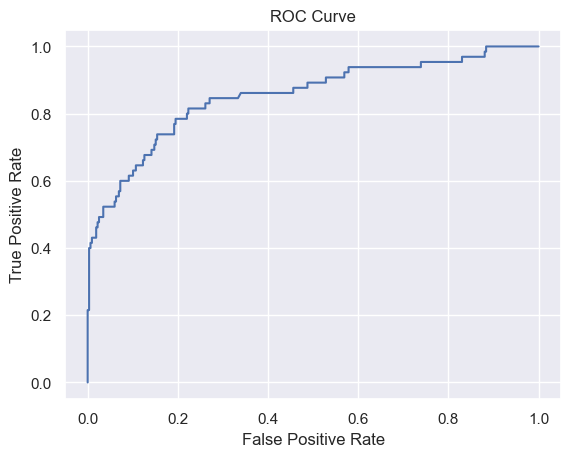

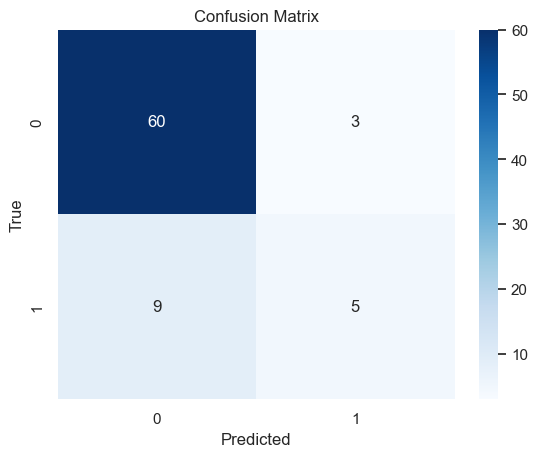

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, roc_curve, roc_auc_score, f1_score
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

mean_accuracy_poly = accuracy_scores.mean()
mean_precision_poly = precision_scores.mean()
mean_roc_auc_poly = roc_auc_scores.mean()

f1_poly = f1_score(y_test, y_pred, average='micro')
print(f"Mean Accuracy: {mean_accuracy_poly}")
print(f"Mean Precision: {mean_precision_poly}")
print(f"Mean ROC AUC: {mean_roc_auc_poly}")
print(f"F1 Score: {f1_poly}")

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

decisiontree

In [67]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features and target variable
X = df_numerical.drop(['Smoking', 'Hx Smoking', 'Smoked'], axis=1)
y = df_numerical['Smoked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_tree = accuracy_score(y_test, y_pred)
accuracy_tree


0.8051948051948052

Mean Accuracy: 0.8144224196855776
Mean Precision: 0.5335897435897435
Mean ROC AUC: 0.7071352258852258
F1 Score: 0.8051948051948051


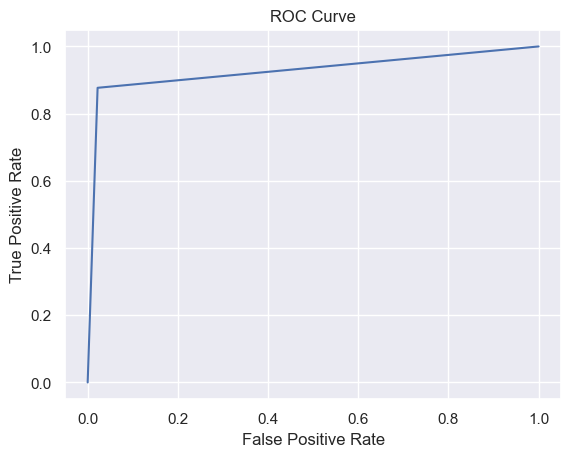

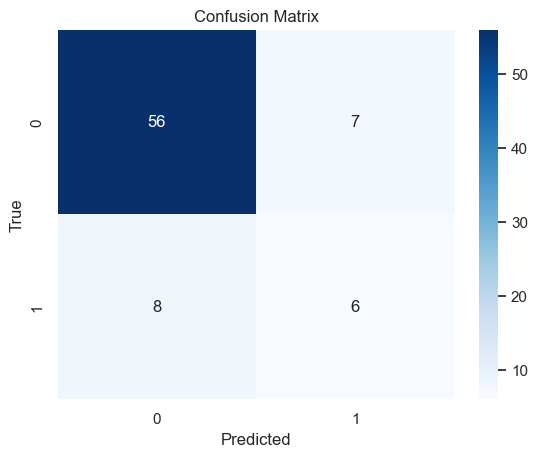

In [68]:
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

mean_accuracy_tree = accuracy_scores.mean()
mean_precision_tree = precision_scores.mean()
mean_roc_auc_tree = roc_auc_scores.mean()

f1_tree = f1_score(y_test, y_pred, average='micro')
print(f"Mean Accuracy: {mean_accuracy_tree}")
print(f"Mean Precision: {mean_precision_tree}")
print(f"Mean ROC AUC: {mean_roc_auc_tree}")
print(f"F1 Score: {f1_tree}")

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

randomforest

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Select the features and target variable
X = df_numerical.drop(['Smoking', 'Hx Smoking', 'Smoked'], axis=1)
y = df_numerical['Smoked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Create a Random Forest classifier
model = RandomForestClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_forest = accuracy_score(y_test, y_pred)
accuracy_forest




0.8441558441558441

Mean Accuracy: 0.8223855092276144
Mean Precision: 0.616031746031746
Mean ROC AUC: 0.8170787545787548
F1 Score: 0.8441558441558441


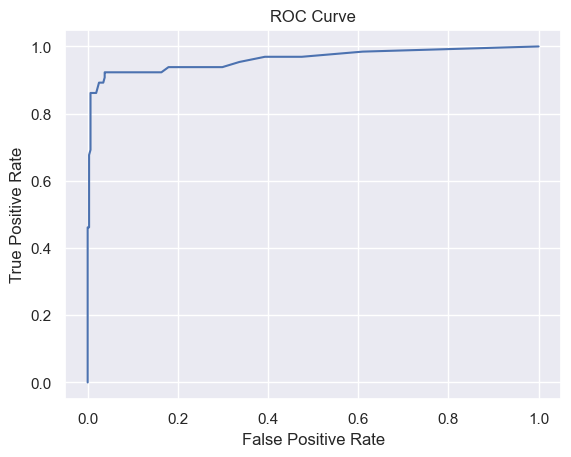

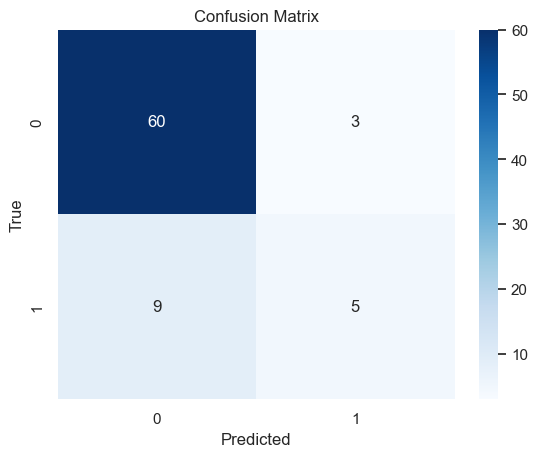

In [70]:
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

mean_accuracy_forest = accuracy_scores.mean()
mean_precision_forest = precision_scores.mean()
mean_roc_auc_forest = roc_auc_scores.mean()

f1_forest = f1_score(y_test, y_pred, average='micro')
print(f"Mean Accuracy: {mean_accuracy_forest}")
print(f"Mean Precision: {mean_precision_forest}")
print(f"Mean ROC AUC: {mean_roc_auc_forest}")
print(f"F1 Score: {f1_forest}")

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

KNN

In [71]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Select the features and target variable
X = df_numerical.drop(['Smoking', 'Hx Smoking', 'Smoked'], axis=1)
y = df_numerical['Smoked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Create a KNN classifier
model = KNeighborsClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy_Knn = accuracy_score(y_test, y_pred)
accuracy_Knn


0.8701298701298701

Mean Accuracy: 0.859090909090909
Mean Precision: 0.6787878787878787
Mean ROC AUC: 0.7235958485958485
F1 Score: 0.8701298701298701


c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


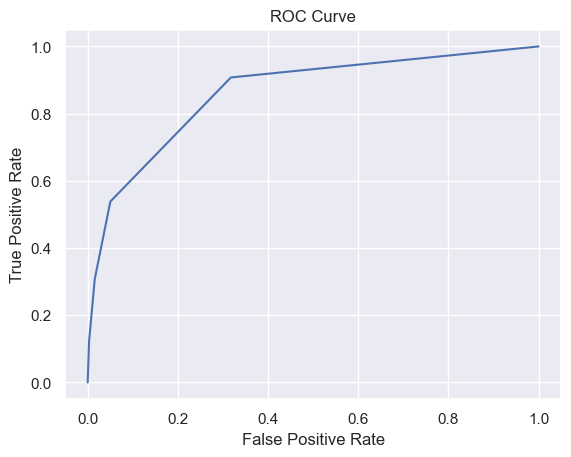

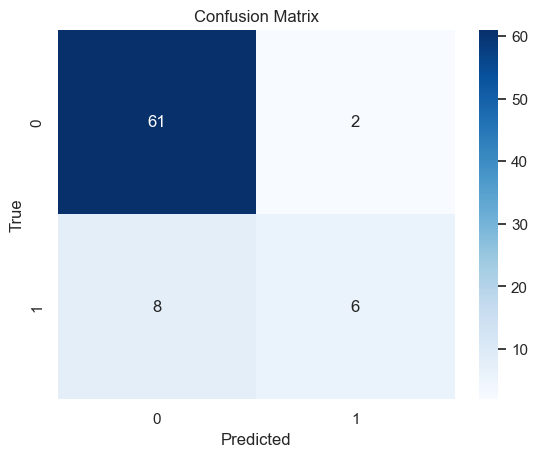

In [72]:
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

mean_accuracy_Knn = accuracy_scores.mean()
mean_precision_Knn = precision_scores.mean()
mean_roc_auc_Knn = roc_auc_scores.mean()

f1_Knn = f1_score(y_test, y_pred, average='micro')
print(f"Mean Accuracy: {mean_accuracy_Knn}")
print(f"Mean Precision: {mean_precision_Knn}")
print(f"Mean ROC AUC: {mean_roc_auc_Knn}")
print(f"F1 Score: {f1_Knn}")
fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Support vector Machine

In [73]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Select the features and target variable
X = df_numerical.drop(['Smoking', 'Hx Smoking', 'Smoked'], axis=1)
y = df_numerical['Smoked']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create an SVM classifier
model = SVC(probability=True)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the accuracy of the model
accuracy_SVM = accuracy_score(y_test, y_pred)
accuracy_SVM



0.8441558441558441

c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gebruiker\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\Gebruik

Mean Accuracy: 0.8302802460697197
Mean Precision: 0.0
Mean ROC AUC: 0.7494314713064714
F1 Score: 0.8441558441558441


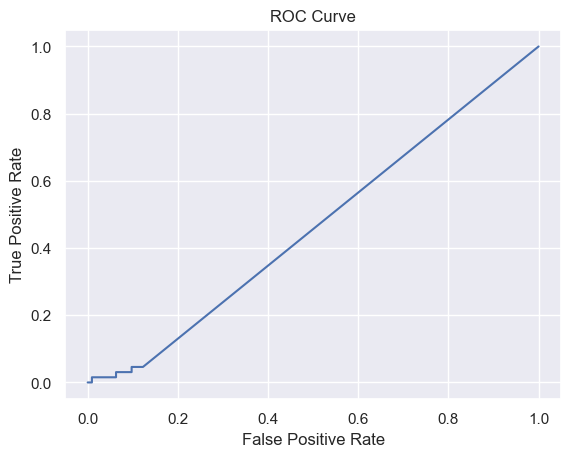

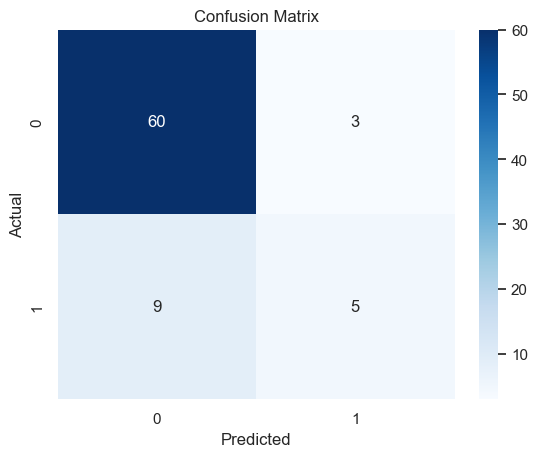

In [74]:
accuracy_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
precision_scores = cross_val_score(model, X, y, cv=5, scoring='precision')
roc_auc_scores = cross_val_score(model, X, y, cv=5, scoring='roc_auc')

mean_accuracy_SVM = accuracy_scores.mean()
mean_precision_SVM = precision_scores.mean()
mean_roc_auc_SVM = roc_auc_scores.mean()

f1_SVM = f1_score(y_test, y_pred, average='micro')
print(f"Mean Accuracy: {mean_accuracy_SVM}")
print(f"Mean Precision: {mean_precision_SVM}")
print(f"Mean ROC AUC: {mean_roc_auc_SVM}")
print(f"F1 Score: {f1_SVM}")

fpr, tpr, thresholds = roc_curve(y, model.predict_proba(X)[:, 1])
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

polynominal regressie

In [75]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X = df_numerical[['Age', 'Stage', 'Gender', 'Thyroid Function']]
y = df_numerical['Smoked']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)

# Create polynomial features
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(mse)
mae = mean_absolute_error(y_test, y_pred)
print(mae)

# Calculate the R2 score with cross-validation
r2_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
mean_r2 = r2_scores.mean()
print(mean_r2)


0.11274905074307336
0.19932058424085533
0.16069124257773623


In [77]:
print("accuraatheid van de modellen")
print("LogisticRegression: accuracy:", accuracy,"mean accuracy:", mean_accuracy_poly, "mean precision:", mean_precision_poly, "mean roc auc:", mean_roc_auc_poly, "f1 score:", f1_poly)
print("DecisionTreeClassifier: accuracy", accuracy_tree, "mean accuracy:", mean_accuracy_tree, "mean precision:", mean_precision_tree, "mean roc auc:", mean_roc_auc_tree, "f1 score:", f1_tree)
print("RandomForestClassifier: accuracy", accuracy_forest, "mean accuracy:", mean_accuracy_forest, "mean precision:", mean_precision_forest, "mean roc auc:", mean_roc_auc_forest, "f1 score:", f1_forest)
print("KNeighborsClassifier: accuracy", accuracy_Knn, "mean accuracy:", mean_accuracy_Knn, "mean precision:", mean_precision_Knn, "mean roc auc:", mean_roc_auc_Knn, "f1 score:", f1_Knn)
print("SVM: accuracy", accuracy_SVM), "mean accuracy:", mean_accuracy_SVM, "mean precision:", mean_precision_SVM, "mean roc auc:", mean_roc_auc_SVM, "f1 score:", f1_SVM
print("LinearRegression MAE:", mae, "MSE:", mse, "mean r2:", mean_r2)


accuraatheid van de modellen
LogisticRegression: accuracy: 0.8441558441558441 mean accuracy: 0.8510936431989065 mean precision: 0.8422222222222222 mean roc auc: 0.8427655677655679 f1 score: 0.8441558441558441
DecisionTreeClassifier: accuracy 0.8051948051948052 mean accuracy: 0.8144224196855776 mean precision: 0.5335897435897435 mean roc auc: 0.7071352258852258 f1 score: 0.8051948051948051
RandomForestClassifier: accuracy 0.8441558441558441 mean accuracy: 0.8223855092276144 mean precision: 0.616031746031746 mean roc auc: 0.8170787545787548 f1 score: 0.8441558441558441
KNeighborsClassifier: accuracy 0.8701298701298701 mean accuracy: 0.859090909090909 mean precision: 0.6787878787878787 mean roc auc: 0.7235958485958485 f1 score: 0.8701298701298701
SVM: accuracy 0.8441558441558441
LinearRegression MAE: 0.19932058424085533 MSE: 0.11274905074307336 mean r2: 0.16069124257773623


In [79]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Smoked,Rad&Rec
0,27,F,0,0,0,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,0,0,0
1,34,F,0,1,0,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,1,0
2,30,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
3,62,F,0,0,0,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
4,62,F,0,0,0,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,1,1,1,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,1,1,1
379,81,M,1,0,1,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1,1,1
380,72,M,1,1,0,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,1,1,0
381,61,M,1,1,1,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,1,1,1


hieruit kan ik concluderen dat Knn het beste is in accuracy en f1, maar logisticRegression is beter in precisie en ROC

ook polynominal werkt ook niet slecht, met een MAE van 0.19, een MSE van 0.11 en een R2 van 0.16


De modellen kunnen dus degelijk voorspellen. Hoewel ik niet super veel nieuws geleerd heb, ben ik een paar opmerkelijke dingen tegengekomen. Zoals alle mensen die actief aan het roken waren nadat ze radiografie ondergaan zijn, zijn hervallen.

In [80]:
df["Thyroid Function"].value_counts()

Thyroid Function
Euthyroid                      332
Clinical Hyperthyroidism        20
Subclinical Hypothyroidism      14
Clinical Hypothyroidism         12
Subclinical Hyperthyroidism      5
Name: count, dtype: int64

Wat is, volgens de verkregen data in stap 1, de waarschijnlijkheid/voorspelling van een recidief bij patiënten bij wie goed-gedifferentieerde schildklierkanker is vastgesteld?

In [85]:
# Calculate the probability of recurrence using the model
recurrence_probability = model_logic.predict_proba(X)[:, 1].mean()

# Print the probability
print(f"The likelihood/probability of recurrence in patients diagnosed with well-differentiated thyroid cancer is: {recurrence_probability}")


The likelihood/probability of recurrence in patients diagnosed with well-differentiated thyroid cancer is: 0.16776285050969342


mijn model kan redelijk accuraat voorspellen of er subtantiegebruik is geweest, wat een grote aanleiding kan zijn voor deze kanker

Er kunnen clusters van info gemaakt worden op basis van verschillende kenmerken, zoals leeftijd, geslacht en rookgewoonten. Ook het stadium zou een goed kenmerk zijn hiervoor

Het aantal clusters gaat afhangen van welke data we nemen, bij leeftijd zou ik er 3 of 4 gebruiken, bij geslacht maar 2

De clusters zullen een beter inzicht geven in de patronen.

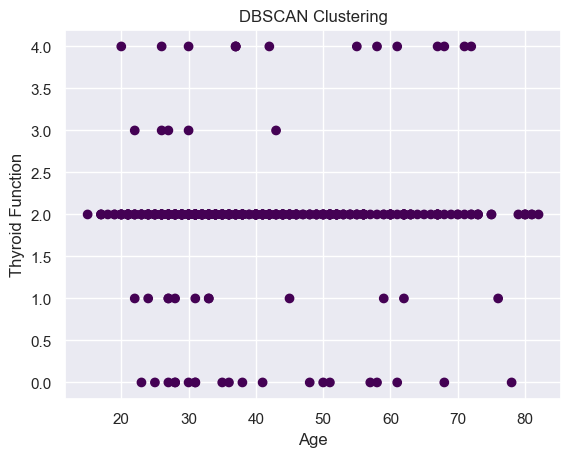

In [94]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Select the features for clustering
X = df_numerical[['Age', 'Thyroid Function']]

# Create a DBSCAN model
dbscan = DBSCAN(eps=3, min_samples=2)

# Fit the model to the data
dbscan.fit(X)

# Get the labels assigned to each data point
labels = dbscan.labels_

# Plot the clusters
plt.scatter(X['Age'], X['Thyroid Function'], c=labels, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Thyroid Function')
plt.title('DBSCAN Clustering')
plt.show()


Density clustering lijkt mij niet zo een goede keuze, want er zijn teveel binaire waarden. Ze liggen allemaal op lijnen en niet verspreid door elkaar.